In [1]:
import sys

import numpy as np

from stixdcpy.quicklook import LightCurves
from stixdcpy.energylut import EnergyLUT
from stixdcpy.housekeeping import Housekeeping
from stixdcpy import ancillary as anc

from stixdcpy.science import L1Product as L1
from stixdcpy.science import SpectrogramProduct as Spectrogram
from stixdcpy.science import L1Product as L1
from stixdcpy.correction import BackgroundSubtraction 
#Spectrogram

from matplotlib import pyplot as plt

from pprint import pprint
%matplotlib notebook

ImportError: cannot import name 'L1Product' from 'stixdcpy.science' (/home/xiaohl/.local/lib/python3.9/site-packages/stixdcpy/science.py)

In [ ]:
request_id=	2108030003
l1sig=L1.fetch(request_id=request_id)

request_id=2107040009
l1bkg=L1.fetch(request_id=request_id)



#Bulk science data request ids (or also called unique ids) can be found on the science data web page at STIX data center

In [3]:
sig_data=l1sig.data
#l1sig.peek()
#data is a fits file object
#sig_data.info()
mask=1-sig_data['CONTROL'].data['energy_bin_mask']
print(mask)
#l1sig.filename
#l1sig.duration
#print(l1sig.ebins_low)



#plt.figure()
#plt.plot(bkg_mean[2,1,:])
#plt.plot(l1bkg.mean_spectra[2, 1,:])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


<IPython.core.display.Javascript object>


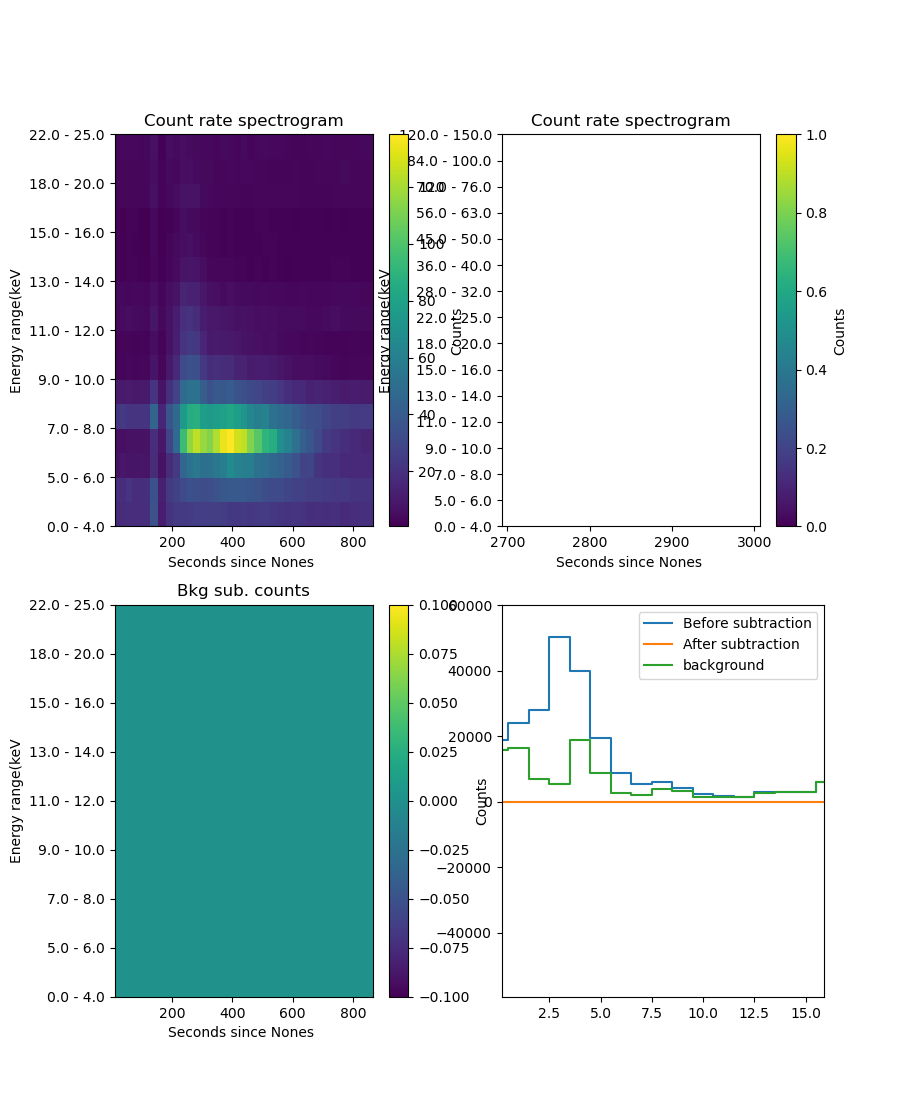

0 17
0 17
0 31
0 31


In [4]:
bsub=BackgroundSubtraction(l1sig, l1bkg)
bsub.peek()

In [9]:
#l1sig.peek()
#science data quicklook
el=EnergyLUT.request('2021-07-07T00:00:00')
tran=el.get_pixel_ebins_transmissions()


<IPython.core.display.Javascript object>


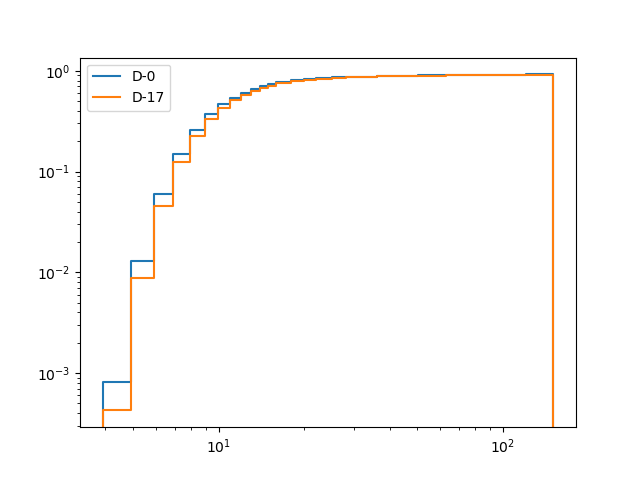

[0.00000000e+00 8.19343847e-04 1.30493845e-02 5.96808705e-02
 1.49220610e-01 2.60574861e-01 3.70911556e-01 4.65184875e-01
 5.40411293e-01 6.03322139e-01 6.55807165e-01 6.99529876e-01
 7.32357370e-01 7.65584031e-01 8.01083550e-01 8.24359829e-01
 8.41685649e-01 8.57959961e-01 8.68490644e-01 8.76046207e-01
 8.83253341e-01 8.88930719e-01 8.93457502e-01 8.97229579e-01
 9.00620222e-01 9.03590297e-01 9.05911450e-01 9.08073814e-01
 9.11207101e-01 9.15268094e-01 9.19787515e-01 0.00000000e+00]


In [16]:
tran.shape
det,pixel=0,1
ipix=det*12+pixel
ebins=el.get_pixel_true_ebins(ipix)
#print(ebins[:,0])
plt.plot(ebins[:,0],tran[det][pixel],drawstyle='steps-post',label='D-0')
plt.plot(ebins[:,0],tran[16][pixel],drawstyle='steps-post',label='D-17')
#plt.plot(ebins[:,0],tran[2][pixel],drawstyle='steps-post')
plt.yscale('log')
plt.xscale('log')
plt.legend()
print(tran[det][pixel])

In [ ]:
#fig=plt.figure()
l1data=sig_data[2].data
#print(l1data['num_energy_groups'])
print(l1data['counts'].shape)
print(l1data['timedel'].shape)
#print(l1data['triggers'])
trigger_rates=l1data['triggers'][1:,:]/l1data['timedel'][:-1,None]

tau=9.6e-6
eta=1e-5
live_time=1 - tau*trigger_rates
photo_in_rates=trigger_rates /(1-tau*trigger_rates)

counts=l1data['counts'][1:,:,:,:]/l1data['timedel'][:-1,None, None, None]

print('counts shape:', counts.shape)
#print(counts.shape)
print('triggers shape:', trigger_rates.shape)
out=np.zeros_like(counts)







In [ ]:
print(counts.shape)


DET_GROUPS = [
	[1, 2],
	[6, 7],
	[5, 11],
	[12, 13],
	[14, 15],
	[10, 16],
	[8, 9],
	[3, 4],
	[31, 32],
	[26, 27],
	[22, 28],
	[20, 21],
	[18, 19],
	[17, 23],
	[24, 25],
	[29, 30]
]
for i, dets in enumerate(DET_GROUPS):
    if i>=2:
        break
    #    continue
    d1,d2=dets[0]-1,dets[1]-1
    #trig=
    fig=plt.figure()
    #print(i, d1,d2)
    trig=trigger_rates[:,i]
    count_sum=np.sum(counts[:,d1,:,:]+ counts[:,d2,:,:], axis=(1,2))
    #plt.plot(trig, label=f'trig {i}')
    ratio=count_sum/trig
    #plt.plot(count_sum,label=f'counts of D{d1}+D{d2}')
    plt.plot(count_sum/trig,label=f'trig #{i} / counts of D{d1}+D{d2}')
    #most of the counts are not recorded at the begining due to the energy range 
    plt.legend()
    #break
    
    
    

    #print(i, '#', trig)
    #print(count_sum)
    #print(l1data['timedel'])


#sci_data.spectrogram[1:, :]

In [ ]:
x=np.arange(6)
y=x+2

In [ ]:
np.column_stack((x,y))